<a href="https://colab.research.google.com/github/deny-joefakri/Acronym-Classification/blob/main/Bert_Akronim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive  
drive.mount('/content/drive', force_remount=True)  

train_dir = '/content/drive/MyDrive/Colab Notebooks/Dataset/Akronim/training.csv'
train_dir_update = '/content/drive/MyDrive/Colab Notebooks/Dataset/Akronim/training_changes.csv'

test_dir = '/content/drive/MyDrive/Colab Notebooks/Dataset/Akronim/testing.csv'
test_dir_update = '/content/drive/MyDrive/Colab Notebooks/Dataset/Akronim/testing_changes.csv'



Mounted at /content/drive


In [3]:
data_train = pd.read_csv(train_dir_update)
data_test = pd.read_csv(test_dir_update)
data_train.head()

,acronym,x1,x2,x3,x4,x5,x6,x7,x8,class
0,BUMD=>Usaha Milik,0.918296,1.000000,-0.67,0.0,1.00,0.500000,0,0.393090,0
1,TNI=>meminjam senjata dari oknum,1.000000,0.500000,-2.00,0.0,0.75,0.000000,0,0.035714,0
2,PKI=>Panitia Pengawas,0.970951,1.000000,-1.00,0.5,1.00,0.333333,0,0.400612,0
3,MA=>putusan Mahkamah,1.000000,0.750000,-2.00,0.0,1.00,1.000000,1,0.392857,0
4,TI=>com Mati body,0.970951,0.666667,-2.50,0.0,1.00,0.000000,0,0.019660,0


In [4]:
X_train = data_train.drop(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'class'], axis=1)
y_train = data_train['class']

X_test = data_test.drop(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'class'], axis=1)
y_test = data_test['class']

print(X_train);
print(X_test);

                                       acronym
0                            BUMD=>Usaha Milik
1             TNI=>meminjam senjata dari oknum
2                        PKI=>Panitia Pengawas
3                         MA=>putusan Mahkamah
4                            TI=>com Mati body
...                                        ...
3995  YPII=>Yayasan Pemulihan Insani Indonesia
3996                  KDG=>Kepala Dipo Gerbong
3997                    Bendum=>Bendahara Umum
3998                 UKM=>Usaha Kecil Menengah
3999      KPCI=>Komite Peduli Calon Independen

[4000 rows x 1 columns]
                                     acronym
0                              AB=>Air Brake
1                             Abar=>Ab barat
2                           BC=>Barang Cepat
3                       BP=>Bagasi dan Power
4                        BH=>Bangunan Hikmat
...                                      ...
1095              Bosowa=>bagi pemberantasan
1096  YLBHI=>Kekerasan di Aceh Jelang Pemilu
1097  

In [5]:
import tensorflow as tf
import tensorflow_hub as hub


In [6]:
import tensorflow_text as text
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4")


In [7]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, epochs=100, batch_size = 32)

model.evaluate(X_test, y_test)

Epoch 1/100
125/125 [==============================] - 54s 348ms/step - loss: 0.6469 - accuracy: 0.6547
Epoch 2/100
125/125 [==============================] - 42s 339ms/step - loss: 0.5713 - accuracy: 0.7510
Epoch 3/100
125/125 [==============================] - 43s 348ms/step - loss: 0.5339 - accuracy: 0.7610
Epoch 4/100
125/125 [==============================] - 43s 340ms/step - loss: 0.5097 - accuracy: 0.7763
Epoch 5/100
125/125 [==============================] - 43s 340ms/step - loss: 0.4898 - accuracy: 0.7865
Epoch 6/100
125/125 [==============================] - 44s 351ms/step - loss: 0.4821 - accuracy: 0.7780
Epoch 7/100
125/125 [==============================] - 43s 343ms/step - loss: 0.4701 - accuracy: 0.7937
Epoch 8/100
125/125 [==============================] - 43s 340ms/step - loss: 0.4620 - accuracy: 0.7935
Epoch 9/100
125/125 [==============================] - 43s 341ms/step - loss: 0.4560 - accuracy: 0.7935
Epoch 10/100
125/125 [==============================] - 43s 345m

[0.38988086581230164, 0.8290908932685852]

35/35 [==============================] - 13s 342ms/step


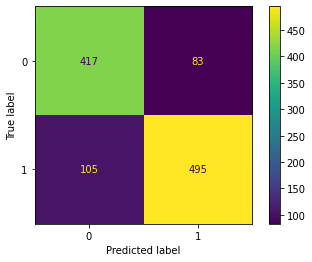

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       500
           1       0.86      0.82      0.84       600

    accuracy                           0.83      1100
   macro avg       0.83      0.83      0.83      1100
weighted avg       0.83      0.83      0.83      1100



In [10]:
# y_predicted = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_testing = model.predict(X_test)
y_pred_testing = y_pred_testing.flatten()
y_pred_testing = np.where(y_pred_testing > 0.5, 1, 0)

cm = confusion_matrix(y_test, y_pred_testing)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_test,y_pred_testing))

# y_predicted = y_predicted.flatten()

125/125 [==============================] - 43s 342ms/step


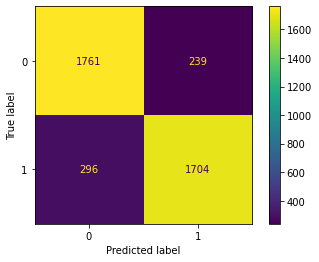

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2000
           1       0.88      0.85      0.86      2000

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000



In [11]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_train = model.predict(X_train)
y_pred_train = y_pred_train.flatten()
y_pred_train = np.where(y_pred_train > 0.5, 1, 0)

cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_train, y_pred_train))